In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from numpy.random import RandomState
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_palette(['#06B1F0', '#FC4B60'])
random_seed = 63445


In [2]:
df = pd.read_csv("train.csv")
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416648 entries, 0 to 416647
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              416648 non-null  int64  
 1   target          416648 non-null  int64  
 2   ps_ind_01       416648 non-null  int64  
 3   ps_ind_02_cat   416648 non-null  int64  
 4   ps_ind_03       416648 non-null  int64  
 5   ps_ind_04_cat   416648 non-null  int64  
 6   ps_ind_05_cat   416648 non-null  int64  
 7   ps_ind_06_bin   416648 non-null  int64  
 8   ps_ind_07_bin   416648 non-null  int64  
 9   ps_ind_08_bin   416648 non-null  int64  
 10  ps_ind_09_bin   416648 non-null  int64  
 11  ps_ind_10_bin   416648 non-null  int64  
 12  ps_ind_11_bin   416648 non-null  int64  
 13  ps_ind_12_bin   416648 non-null  int64  
 14  ps_ind_13_bin   416648 non-null  int64  
 15  ps_ind_14       416648 non-null  int64  
 16  ps_ind_15       416648 non-null  int64  
 17  ps_ind_16_

In [4]:
(df==-1).sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        148
ps_ind_03              0
ps_ind_04_cat         55
ps_ind_05_cat       4047
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03          75476
ps_car_01_cat         76
ps_car_02_cat          2
ps_car_03_cat     288186
ps_car_04_cat          0
ps_car_05_cat     186614
ps_car_06_cat          0
ps_car_07_cat       8095
ps_car_08_cat          0
ps_car_09_cat        389
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          29822
ps_car_15              0
ps_calc_01             0


# Filling missing values for Numerical Features

In [5]:
df['ps_reg_03'].mean()

0.5509342994190947

In [6]:
df['ps_reg_03']=df['ps_reg_03'].replace(-1,np.NAN)
df['ps_reg_03'].mean()

0.8940407594537703

In [7]:
df['ps_reg_03']=df['ps_reg_03'].replace(np.nan,df['ps_reg_03'].mean())
df['ps_reg_03'].mean()

0.8940407594546824

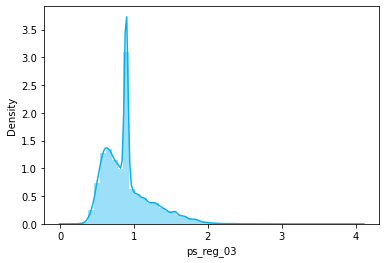

In [8]:
ax = sns.distplot(df.ps_reg_03)
plt.show()

In [9]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
df['ps_car_11'] = imputer.fit_transform(df[['ps_car_11']])
(df['ps_car_11']==-1).sum()

0

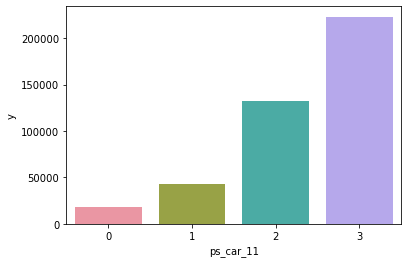

In [10]:
sns.countplot(df.ps_car_11);
plt.xlabel('ps_car_11');
plt.ylabel('y');
plt.show()

In [11]:
df['ps_car_14']=df['ps_car_14'].replace(-1,np.NAN)
df['ps_car_14']=df['ps_car_14'].replace(np.nan,df['ps_car_14'].mean())

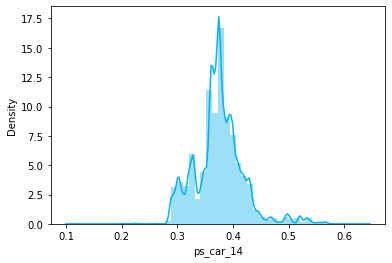

In [12]:
ax = sns.distplot(df.ps_car_14)
plt.show()

# Filling missing values of categorical features

In [22]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
df['ps_ind_02_cat'] = imputer.fit_transform(df[['ps_ind_02_cat']])
(df['ps_ind_02_cat']==-1).sum()

0

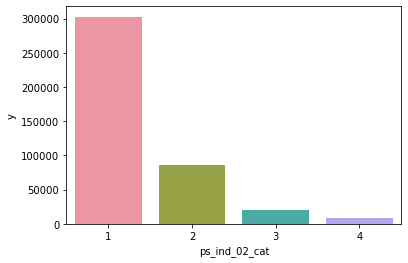

In [23]:
sns.countplot(df.ps_ind_02_cat);
plt.xlabel('ps_ind_02_cat');
plt.ylabel('y');
plt.show()

In [24]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
df['ps_ind_04_cat'] = imputer.fit_transform(df[['ps_ind_04_cat']])
(df['ps_ind_04_cat']==-1).sum()

0

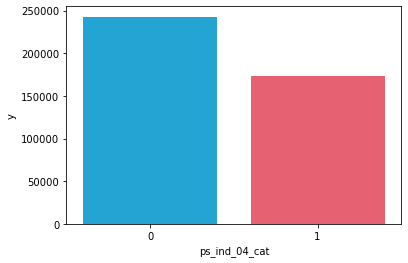

In [25]:
sns.countplot(df.ps_ind_04_cat);
plt.xlabel('ps_ind_04_cat');
plt.ylabel('y');
plt.show()

In [26]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
df['ps_ind_05_cat'] = imputer.fit_transform(df[['ps_ind_05_cat']])
(df['ps_ind_05_cat']==-1).sum()

0

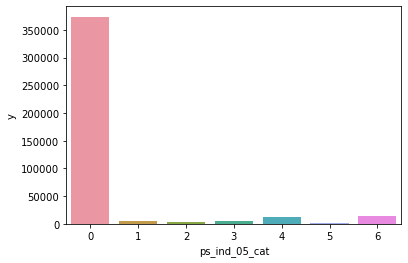

In [27]:
sns.countplot(df.ps_ind_05_cat);
plt.xlabel('ps_ind_05_cat');
plt.ylabel('y');
plt.show()


In [28]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'median')
df['ps_car_01_cat'] = imputer.fit_transform(df[['ps_car_01_cat']])
(df['ps_car_01_cat']==-1).sum()

0

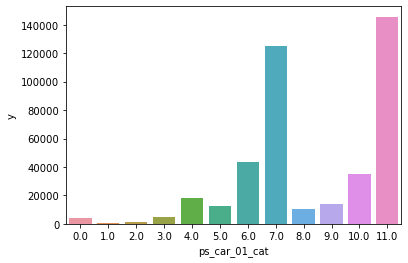

In [29]:
sns.countplot(df.ps_car_01_cat);
plt.xlabel('ps_car_01_cat');
plt.ylabel('y');
plt.show()

In [30]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
df['ps_car_02_cat'] = imputer.fit_transform(df[['ps_car_02_cat']])
(df['ps_car_02_cat']==-1).sum()

0

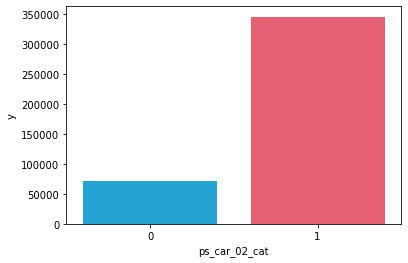

In [31]:
sns.countplot(df.ps_car_02_cat);
plt.xlabel('ps_car_02_cat');
plt.ylabel('y');
plt.show()

In [32]:
df['ps_car_03_cat']=df['ps_car_03_cat'].replace(-1,np.NAN)

In [33]:
df['ps_car_03_cat']=df['ps_car_03_cat'].fillna(method='bfill')

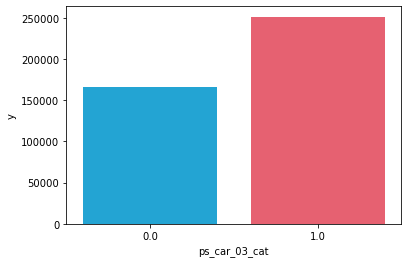

In [34]:
sns.countplot(df.ps_car_03_cat);
plt.xlabel('ps_car_03_cat');
plt.ylabel('y');
plt.show()

In [35]:
df['ps_car_05_cat']=df['ps_car_05_cat'].replace(-1,np.NAN)

In [36]:
df['ps_car_05_cat']=df['ps_car_05_cat'].fillna(method='bfill')

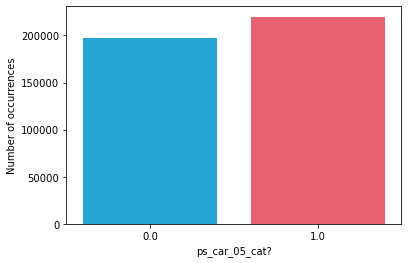

In [37]:
sns.countplot(df.ps_car_05_cat );
plt.xlabel('ps_car_05_cat?');
plt.ylabel('Number of occurrences');
plt.show()

In [38]:
df['ps_car_09_cat'].value_counts()

 2    247445
 0    136298
 1     20234
 3     10279
 4      2003
-1       389
Name: ps_car_09_cat, dtype: int64

In [39]:
df['ps_car_07_cat'].value_counts()

 1    387211
 0     21342
-1      8095
Name: ps_car_07_cat, dtype: int64

In [40]:
df['ps_car_09_cat'] = df['ps_car_09_cat'].replace(-1, df['ps_car_09_cat'].value_counts().index[0])
df['ps_car_07_cat'] = df['ps_car_07_cat'].replace(-1, df['ps_car_07_cat'].value_counts().index[0])

In [41]:
df['ps_car_09_cat'].value_counts()

2    247834
0    136298
1     20234
3     10279
4      2003
Name: ps_car_09_cat, dtype: int64

In [42]:
df['ps_car_07_cat'].value_counts()

1    395306
0     21342
Name: ps_car_07_cat, dtype: int64

In [43]:
(df == -1).sum()
#df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [44]:
fd = pd.read_csv("test.csv")
fd.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

In [45]:
(fd==-1).sum()

id                     0
ps_ind_01              0
ps_ind_02_cat         68
ps_ind_03              0
ps_ind_04_cat         28
ps_ind_05_cat       1762
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03          32296
ps_car_01_cat         31
ps_car_02_cat          3
ps_car_03_cat     123045
ps_car_04_cat          0
ps_car_05_cat      79937
ps_car_06_cat          0
ps_car_07_cat       3394
ps_car_08_cat          0
ps_car_09_cat        180
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              4
ps_car_12              1
ps_car_13              0
ps_car_14          12798
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [46]:
fd.isnull().sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [47]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
fd['ps_car_02_cat'] = imputer.fit_transform(fd[['ps_car_02_cat']])
(fd['ps_car_02_cat']==-1).sum()

0

In [48]:
x_test.isnull().sum()

NameError: name 'x_test' is not defined

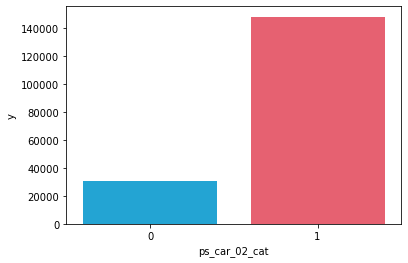

In [49]:
sns.countplot(fd.ps_car_02_cat);
plt.xlabel('ps_car_02_cat');
plt.ylabel('y');
plt.show()

In [50]:
imputer = SimpleImputer(missing_values = np.NAN , strategy = 'most_frequent')
fd['ps_car_03_cat'] = imputer.fit_transform(fd[['ps_car_03_cat']])
(fd['ps_car_03_cat']==np.NAN).sum()

0

In [51]:
imputer = SimpleImputer(missing_values = np.NAN , strategy = 'most_frequent')
fd['ps_car_05_cat'] = imputer.fit_transform(fd[['ps_car_05_cat']])
(fd['ps_car_05_cat']==np.NAN).sum()

0

In [52]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
fd['ps_car_04_cat'] = imputer.fit_transform(fd[['ps_car_04_cat']])
(fd['ps_car_04_cat']==-1).sum()

0

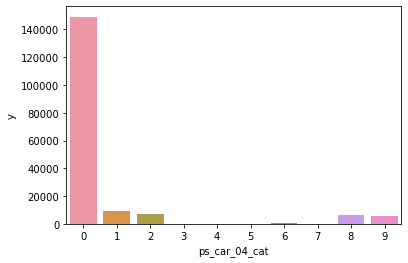

In [53]:
sns.countplot(fd.ps_car_04_cat);
plt.xlabel('ps_car_04_cat');
plt.ylabel('y');
plt.show()

In [54]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
fd['ps_car_04_cat'] = imputer.fit_transform(fd[['ps_car_04_cat']])
(fd['ps_car_04_cat']==-1).sum()

0

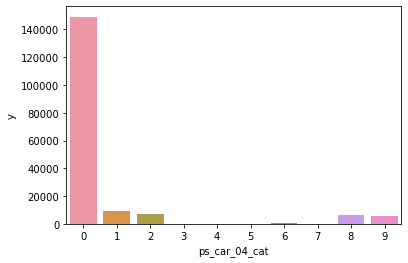

In [55]:
sns.countplot(fd.ps_car_04_cat);
plt.xlabel('ps_car_04_cat');
plt.ylabel('y');
plt.show()

In [56]:
fd['ps_car_01_cat']=fd['ps_car_01_cat'].replace(-1,np.NAN)

In [57]:
fd['ps_car_01_cat']=fd['ps_car_01_cat'].fillna(method='bfill')

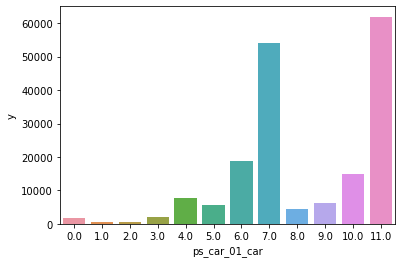

In [58]:
sns.countplot(fd.ps_car_01_cat);
plt.xlabel('ps_car_01_car');
plt.ylabel('y');
plt.show()

In [59]:
fd['ps_car_03_cat']=fd['ps_car_03_cat'].replace(-1,np.NAN)

In [60]:
fd['ps_car_03_cat']=fd['ps_car_03_cat'].fillna(method='bfill')

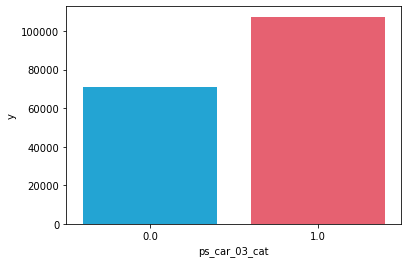

In [61]:
sns.countplot(fd.ps_car_03_cat);
plt.xlabel('ps_car_03_cat');
plt.ylabel('y');
plt.show()

In [62]:
fd['ps_car_05_cat']=fd['ps_car_05_cat'].replace(-1,np.NAN)

In [63]:
fd['ps_car_05_cat']=fd['ps_car_05_cat'].fillna(method='bfill')

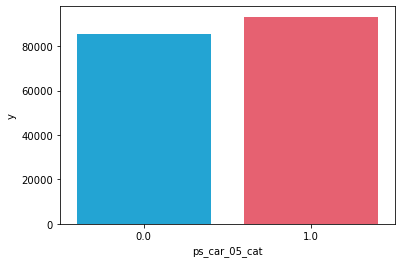

In [64]:
sns.countplot(fd.ps_car_05_cat);
plt.xlabel('ps_car_05_cat');
plt.ylabel('y');
plt.show()

In [65]:
fd['ps_car_07_cat']=fd['ps_car_07_cat'].replace(-1,np.NAN)

In [66]:
fd['ps_car_07_cat']=fd['ps_car_07_cat'].fillna(method='bfill')

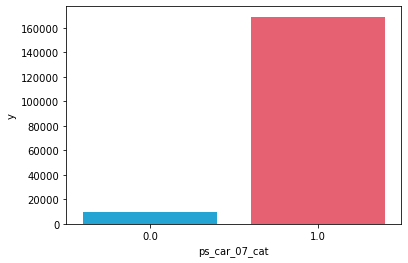

In [67]:
sns.countplot(fd.ps_car_07_cat);
plt.xlabel('ps_car_07_cat');
plt.ylabel('y');
plt.show()

In [68]:
fd['ps_car_09_cat']=fd['ps_car_09_cat'].replace(-1,np.NAN)

In [69]:
fd['ps_car_09_cat']=fd['ps_car_09_cat'].fillna(method='bfill')

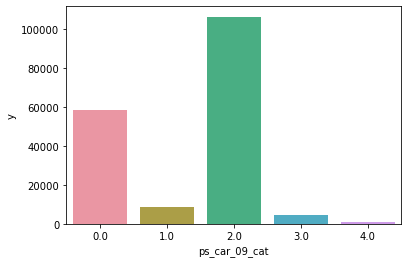

In [70]:
sns.countplot(fd.ps_car_09_cat);
plt.xlabel('ps_car_09_cat');
plt.ylabel('y');
plt.show()

In [71]:
fd['ps_reg_03']=fd['ps_reg_03'].replace(-1,np.NAN)
fd['ps_reg_03'].mean()

0.894062645460865

In [72]:
fd['ps_reg_03']=fd['ps_reg_03'].replace(np.nan,fd['ps_reg_03'].mean())
fd['ps_reg_03'].mean()

0.8940626454610215

In [73]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
fd['ps_car_11'] = imputer.fit_transform(fd[['ps_car_11']])
(fd['ps_car_11']==-1).sum()

0

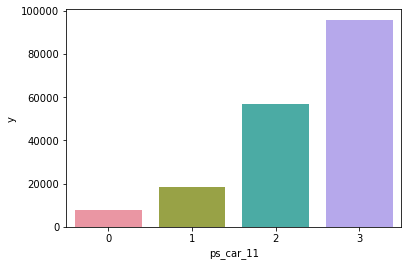

In [74]:
sns.countplot(fd.ps_car_11);
plt.xlabel('ps_car_11');
plt.ylabel('y');
plt.show()

In [75]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
fd['ps_car_12'] = imputer.fit_transform(fd[['ps_car_12']])
(fd['ps_car_12']==-1).sum()

0

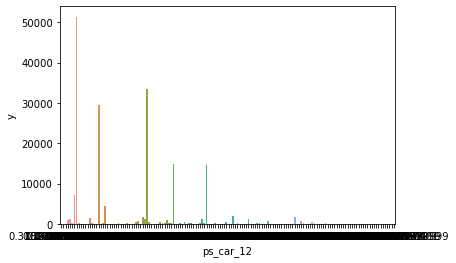

In [76]:
sns.countplot(fd.ps_car_12);
plt.xlabel('ps_car_12');
plt.ylabel('y');
plt.show()

In [77]:
fd['ps_car_14']=fd['ps_car_14'].replace(-1,np.NAN)
fd['ps_car_14']=fd['ps_car_14'].replace(np.nan,fd['ps_car_14'].mean())

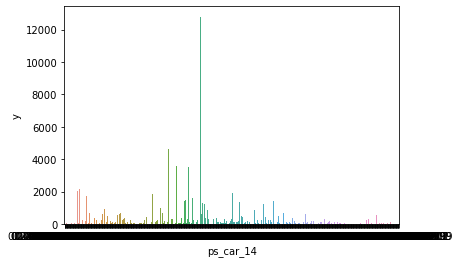

In [78]:
sns.countplot(fd.ps_car_14);
plt.xlabel('ps_car_14');
plt.ylabel('y');
plt.show()

In [79]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
fd['ps_ind_02_cat'] = imputer.fit_transform(fd[['ps_ind_02_cat']])
(fd['ps_ind_02_cat']==-1).sum()

0

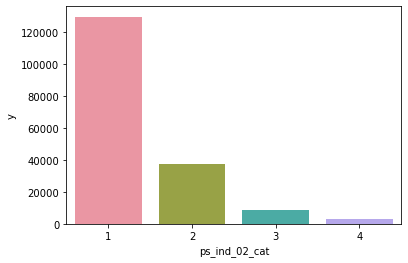

In [80]:
sns.countplot(fd.ps_ind_02_cat);
plt.xlabel('ps_ind_02_cat');
plt.ylabel('y');
plt.show()

In [81]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
fd['ps_ind_04_cat'] = imputer.fit_transform(fd[['ps_ind_04_cat']])
(fd['ps_ind_04_cat']==-1).sum()

0

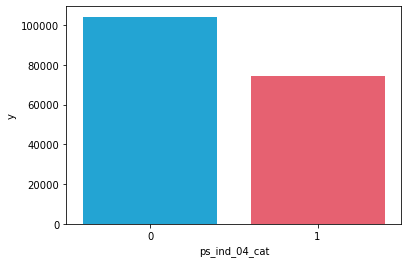

In [82]:
sns.countplot(fd.ps_ind_04_cat);
plt.xlabel('ps_ind_04_cat');
plt.ylabel('y');
plt.show()

In [83]:
imputer = SimpleImputer(missing_values = -1 , strategy = 'most_frequent')
fd['ps_ind_05_cat'] = imputer.fit_transform(fd[['ps_ind_05_cat']])
(fd['ps_ind_05_cat']==-1).sum()

0

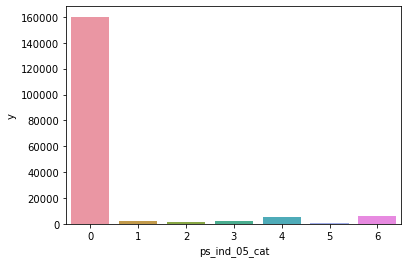

In [84]:
sns.countplot(fd.ps_ind_05_cat);
plt.xlabel('ps_ind_05_cat');
plt.ylabel('y');
plt.show()

In [85]:
(fd==-1).sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [86]:
(fd==np.NaN).sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [87]:
df = df.reset_index()
fd = fd.reset_index()

In [88]:
from sklearn.feature_selection import SelectKBest , f_classif,SelectPercentile
from sklearn.feature_selection import chi2



# Assiging the value in x_train, x_test,y_train

In [89]:
y_train  =  df.target
df.drop(['target', 'id'], axis='columns', inplace=True)
df.drop('index',inplace=True,axis='columns')
x_train = df
fd.drop('id',inplace=True,axis='columns')

In [90]:
fd.drop('index',inplace=True,axis='columns')

In [91]:
x_test = fd

In [92]:
x_test.shape

(178564, 57)

In [93]:
fd.isnull().sum()

ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     5
ps_car_04_cat     0
ps_car_05_cat     2
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [95]:
imputer = SimpleImputer(missing_values = np.NaN , strategy = 'most_frequent')
x_test['ps_car_03_cat'] = imputer.fit_transform(x_test[['ps_car_03_cat']])
(x_test['ps_car_03_cat']==np.NaN).sum()

0

In [96]:
imputer = SimpleImputer(missing_values = np.NaN , strategy = 'most_frequent')
x_test['ps_car_05_cat'] = imputer.fit_transform(x_test[['ps_car_05_cat']])
(x_test['ps_car_05_cat']==-1).sum()

0

# Feature Selection using SelectKBest

selector = SelectKBest(f_classif, k=20)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)

In [101]:
print("X_train.shape: {}".format(x_train.shape))
print("X_train_selected.shape: {}".format(x_train_selected.shape))

X_train.shape: (416648, 57)
X_train_selected.shape: (416648, 20)


In [102]:
x_train.shape


(416648, 57)

In [103]:
x_train.columns


Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [104]:
x_test.shape

(178564, 57)

In [105]:
(x_test==-1).sum()

ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [106]:
(x_test == np.NaN).sum()

ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [107]:
t=np.any(np.isnan(x_train)) 
print(t)

False


In [108]:
t=np.any(np.isnan(x_test)) 
print(t)

False


In [109]:
t=np.all(np.isfinite(x_train))
print(t)

True


In [110]:
t=np.all(np.isfinite(x_test))
print(t)

True


# APPLYING LOGISTIC REGRESSION

In [113]:
from sklearn.linear_model import LogisticRegression
# transform test data
x_test_selected = selector.transform(x_test)
lr = LogisticRegression()
lr.fit(x_train_selected, y_train)

LogisticRegression()

# with the help of getsupport we can find out which features are selected by the algorithm

[ True False False False  True  True  True  True False False False False
 False False  True  True  True False  True  True  True  True  True False
  True False False  True  True False False False False  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False]


Text(0.5, 0, 'Sample index')

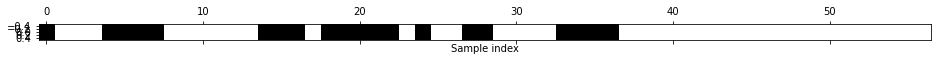

In [112]:
mask = selector.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [121]:
preds = lr.predict(x_test_selected)
print(preds)

[0 0 0 ... 0 0 0]


# Feature Selection using SelectPercentile

In [851]:
select = SelectPercentile(percentile=50)
select.fit(x_train, y_train)
# transform training set
x_train_selected = select.transform(x_train)
print("x_train.shape: {}".format(x_train.shape))
print("x_train_selected.shape: {}".format(x_train_selected.shape))


x_train.shape: (416648, 57)
x_train_selected.shape: (416648, 28)


In [856]:
from sklearn.linear_model import LogisticRegression
# transform test data
x_test_selected = select.transform(x_test)

[ True False  True  True  True  True  True  True  True False False  True
 False  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True False False False  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False]


Text(0.5, 0, 'Sample index')

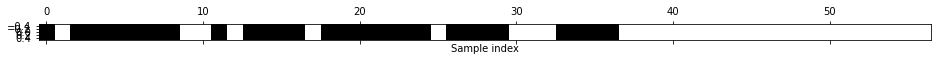

In [858]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

# Feature_Selection using RFE(Recursive Feature eliminator)

In [862]:
from sklearn.feature_selection import RFE

In [ ]:
#select = RFE(RandomForestClassifier(n_estimators=2, random_state=42),n_features_to_select=8)
#select.fit(x_train, y_train)
# visualize the selected features:
#mask = select.get_support()
#plt.matshow(mask.reshape(1, -1), cmap='gray_r')
#plt.xlabel("Sample index")

In [ ]:
#x_train_rfe= select.transform(x_train)
#x_test_rfe= select.transform(x_test)
#score = LogisticRegression().fit(x_train_rfe, y_train).score(x_test_rfe, y_test)
#print("Test score: {:.3f}".format(score))